# Change Data

In [7]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import pickle

gpus = tf.config.experimental.list_physical_devices('GPU')
for g in gpus:
    if g:
        try:
            tf.config.experimental.set_virtual_device_configuration(
                g,[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
        except RuntimeError as e:
            print(e)

actions = np.array(['normal', 'abnormal'])
LABEL = ['NORMAL', 'ABNORMAL']
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

# Initialize lists to store sequences and labels
sequences, labels = [], []
#하이퍼 파라미터 값 설정    
epochs = 200
batch = 40
lr = 0.001
sequence_length = 40 # 작게 설정
num_features = 30
num_classes = 2
pass_frames = 1 # 넘기는 개수(4개에 한번 씩)
latent_vector = 8
bbox = 4 # bbox 값 4개

def write_file(file_path,file_content):
    # 파일 쓰기
    with open(file_path, 'a') as file:
        file.write(file_content)


def Store_data(x_data,y_data,path):
    flatten_x_train = x_data.reshape(x_data.shape[0],-1)
    # 주어진 데이터
    data_train = pd.DataFrame({'Features': flatten_x_train.tolist(), 'Labels': y_data.tolist()})
    # CSV 파일로 저장
    data_train.to_csv(path, index=False)



def save_data(filename, data):
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

def load_data(filename):
    with open(filename, 'rb') as file:
        loaded_data = pickle.load(file)
    return loaded_data



# 모델 저장 폴더 생성

folder_path = '/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data'

# 폴더 내 숫자로 구성된 서브폴더 찾기
subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f)) and f.isdigit()]

# 숫자로 구성된 서브폴더가 없으면 1로 시작하는 폴더 생성
if not subfolders:
    new_folder_name = '1'
else:
    # 가장 큰 숫자 찾기
    max_number = max(map(int, subfolders))
    # 다음 폴더의 숫자 계산
    new_folder_number = max_number + 1
    new_folder_name = str(new_folder_number)

# 새로운 폴더 경로 생성
save_model_dir = os.path.join(folder_path, new_folder_name)

# 새로운 폴더 생성
os.makedirs(save_model_dir,exist_ok = True)
txtfile_path = os.path.join(save_model_dir, 'info.txt')


write_file(txtfile_path, f'sequence_length : {sequence_length}\npass_frames = {pass_frames}\n')

# Normal_full
cat_normal_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/normal_cat_full/keypoints"
keypoints_files = [f for f in os.listdir(cat_normal_path)]

for keypoints in keypoints_files:
    new_sequences = []
    cnt = 0
    keypoints_path = os.path.join(cat_normal_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for t in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{t}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            sequences.append(new_list)
            new_sequences.append(new_list)
            window = []
            labels.append(label_map['normal'])
            cnt = 0
        if t == len(keypoint_file) -1 :
            video_data = np.array(new_sequences)
            video_folder = os.path.join(save_model_dir, keypoints)
            print(video_folder)
            os.makedirs(video_folder)
            save_data(os.path.join(video_folder,'dist.pkl'), video_data)
write_file(txtfile_path,f'Normal data : {labels.count(0)}\n')




{'normal': 0, 'abnormal': 1}
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/나를 다시 살 수 있게 만들어준 나의 고양이
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/아셨나요_ 고양이는 _잘 안씻는 사람_을 더 좋아한다는 사실!
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/고양이가 집사를 100_ 신뢰해야 할 수 있는 행동
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/말도 안되는 평온함이 있는 고양이 건강검진 (부제 _ 그럼 우리 아들은 뭐가 되는 것인가..ㅠㅠ)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/이젠 유기동물까지 확대하러 간 유튜버 (제이와나x지안스캣)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/고양이가 좋아하는 스킨십이 뭐라고..했더라.._
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/얼굴로 먹고사는 고양이 레전드 영상 모음집
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/백신2차 후유증으로 아픈 집사 곁을 떠나지 않는 고양이
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/한밤중에 휘파람 불었다가 혼구녕 났습니다
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/좋은 마음으로 탁묘를 받아줬는데 이렇게 미움받을 줄이야..
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/꼬리 밟아서 삐진 고양이 달래주기가 이렇게 어려울 줄이야..
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/아니 우리집 고양이만 하루에 다섯끼 먹어요.._
/home/s

# Normal Short

In [9]:

cat_normal_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/Normal_short/keypoints"
keypoints_files = [f for f in os.listdir(cat_normal_path)]

for keypoints in keypoints_files:
    new_sequences = []
    cnt = 0
    keypoints_path = os.path.join(cat_normal_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for t in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{t}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            sequences.append(new_list)
            new_sequences.append(new_list)
            window = []
            labels.append(label_map['normal'])
            cnt = 0
        if t == len(keypoint_file) -1 :
            video_data = np.array(new_sequences)
            video_folder = os.path.join(save_model_dir,'Normal', keypoints)
            print(video_folder)
            os.makedirs(video_folder)
            save_data(os.path.join(video_folder,'dist.pkl'), video_data)
write_file(txtfile_path,f'Normal data : {labels.count(0)}\n')


/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/I TOOK A CAT FROM THE STREET AND ITS PREGNANT! How to take care of your pets by Coolala
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/Zelenogorsk the Pallass cat warms his paws on his tail
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/My cat is seeking affection and attention every morning💖 shorts cute cat
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/5 common cat myths you should stop believing  cat
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/Off to the Vet (Full Film in COLOUR) I A Simon’s Cat SPECIAL
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/People Who Hate Cats Meet Kittens
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/퇴근 후 와 봤더니  When I happened to see my cats after working
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/Cute and Funny Cat Videos to Keep You Smiling! 🐱
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Normal/These Cats Speak English Bett

In [10]:
print(np.array(sequences).shape)

(38844, 40, 15, 15)


# Cat Limping(abnormal)

In [11]:

cat_keypoint_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/Abnormal/cat_limping_refined/keypoints"
keypoints_files = [f for f in os.listdir(cat_keypoint_path)]
abnormal_sequence = []
for keypoints in keypoints_files:
    new_sequences = []
    cnt = 0
    keypoints_path = os.path.join(cat_keypoint_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for t in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{t}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            abnormal_sequence.append(new_list)
            new_sequences.append(new_list)
            window = []
            labels.append(label_map['normal'])
            cnt = 0
        if t == len(keypoint_file) -1 :
            video_data = np.array(new_sequences)
            video_folder = os.path.join(save_model_dir,'Abnormal', keypoints)
            print(video_folder)
            os.makedirs(video_folder)
            save_data(os.path.join(video_folder,'dist.pkl'), video_data)
write_file(txtfile_path,f'Normal data : {labels.count(0)}\n')


/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Sassy limping (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Battling Limping Calicivirus (3)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/A limping community cat (4)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Super friendly limping cat. (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Battling Limping Calicivirus (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Clever Cat Fakes Paw Injury to Get Inside House (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/My Cat Alex was Limping (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/A Limping Cat Abandoned By Its Owner (3)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/A Limping Cat Abandoned By Its Owner (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Zoya limping (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Sassy limping (4)
/home/sm32289/Cat_Pos

# Cat_Sneezing(abnormal)

In [12]:
cat_keypoint_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/Abnormal/Cat_Sneezing/keypoints"
keypoints_files = [f for f in os.listdir(cat_keypoint_path)]

for keypoints in keypoints_files:
    new_sequences = []
    cnt = 0
    keypoints_path = os.path.join(cat_keypoint_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for t in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{t}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            abnormal_sequence.append(new_list)
            new_sequences.append(new_list)
            window = []
            labels.append(label_map['normal'])
            cnt = 0
        if t == len(keypoint_file) -1 :
            video_data = np.array(new_sequences)
            video_folder = os.path.join(save_model_dir,'Abnormal', keypoints)
            print(video_folder)
            os.makedirs(video_folder)
            save_data(os.path.join(video_folder,'dist.pkl'), video_data)
write_file(txtfile_path,f'Normal data : {labels.count(0)}\n')


/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Funny Sneezing Cats 😹 Cats Can_t Stop Sneezing  (Full) [Funny Pets] (14)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Sneezing cat 🐱🤧 (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Cat Sneezes Big During Movie __ ViralHog (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/The best compilation cats are sneezing 2016 #2 (3)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Funny Sneezing Cats 😹 Cats Can_t Stop Sneezing  (Full) [Funny Pets] (17)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Adorable Kitten Can_t Stop Sneezing! (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Funny Sneezing Cats 😹 Cats Can_t Stop Sneezing  (Full) [Funny Pets] (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Adorable kitten has sneezing fit. (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Funny Sneezing Cats 😹 Cats Can_t Stop Sneezing  (Full) [Funny Pet

# Throwing_up(abnormal)

In [13]:
cat_keypoint_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/Abnormal/cat_throwing_up_refined/keypoints"
keypoints_files = [f for f in os.listdir(cat_keypoint_path)]

for keypoints in keypoints_files:
    new_sequences = []
    cnt = 0
    keypoints_path = os.path.join(cat_keypoint_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for t in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{t}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            abnormal_sequence.append(new_list)
            new_sequences.append(new_list)
            window = []
            labels.append(label_map['normal'])
            cnt = 0
        if t == len(keypoint_file) -1 :
            video_data = np.array(new_sequences)
            video_folder = os.path.join(save_model_dir,'Abnormal', keypoints)
            print(video_folder)
            os.makedirs(video_folder)
            save_data(os.path.join(video_folder,'dist.pkl'), video_data)
write_file(txtfile_path,f'Normal data : {labels.count(0)}\n')


/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Funny cat vomiting (3)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Sick cat throws up
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/POOR CAT THROWS UP😱 _ TOO MUCH GRASS🌾 #funnycats #shorts (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Cat Vomiting  _  How Does A Cat Vomit (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Vomiting a hairball 🤮 #scottishfold #cat #cutecat #pet #kitty #catlover #cats #catvideos #catshorts (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Cat Throwing Up (2)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/Why do Cats Throw up_ Cat VomitㅣDino cat information (5)
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/The voice of the comb made the cats vomit - Funny Pet Videos Compilation
/home/sm32289/Cat_Pose/AutoEncoder/Model2/Data/2/Abnormal/5 Signs Your Cat Is Dying-2 #shorts
/home/sm32289/Cat_Pose/AutoEncoder/Model2/D

In [14]:
print(np.array(sequences).shape)
print(np.array(abnormal_sequence).shape)

(38844, 40, 15, 15)
(1328, 40, 15, 15)


In [ ]:
#Normal
save_data(os.path.join(save_model_dir,'Normal','dist.pkl'), np.array(sequences))
#Abnoraml
save_data(os.path.join(save_model_dir,'Abnormal','dist.pkl'), np.array(abnormal_sequence))



# Visualize Dist data

[0.20852317 0.20963627 0.20845737 0.20973552 0.21028078 0.21018113
 0.20979898 0.21005844 0.20894769 0.20836966 0.2093827  0.20709457
 0.20800431 0.20807619 0.20667037 0.20893858 0.20813286 0.20871918
 0.20896737 0.21061461 0.20996289 0.20929521 0.20789788 0.20846648
 0.2083875  0.20993103 0.20944016 0.20978004 0.21079559 0.21033668
 0.21419076 0.2127683  0.21238586 0.21276023 0.21397746 0.21330238
 0.21283953 0.21376523 0.21271627 0.21090386]


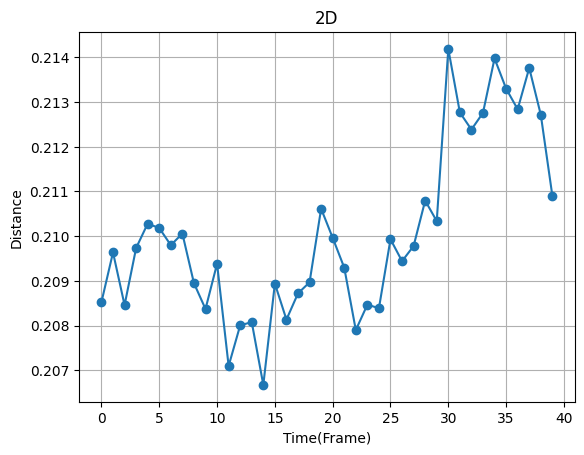

In [26]:
import matplotlib.pyplot as plt
import numpy as np



# X축은 2번째 shape인 40으로 설정
x_values = np.arange(x_train.shape[1])

# Y축은 각 데이터에 대한 평균값으로 설정
y_values = x_train[100][:,4,13]
# y_values = x_valid_y1[100][:,4,13]

print(y_values)

# 그래프 그리기
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('2D')
plt.xlabel('Time(Frame)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


[0.24767189 0.20725518 0.20734077 0.19426248 0.18423765 0.15283012
 0.15831416 0.17596798 0.22111271 0.23421379 0.2250659  0.2299039
 0.22150581 0.2040241  0.18726353 0.19561317 0.19841188 0.18906637
 0.18614538 0.17823468 0.20553003 0.20552365 0.21641044 0.176588
 0.2229716  0.24380454 0.24122995 0.23666941 0.53329199 0.2056083
 0.5795039  0.65156614 0.65961966 0.24720217 0.1599341  0.12106104
 0.17604748 0.21467329 0.2117769  0.2069473 ]


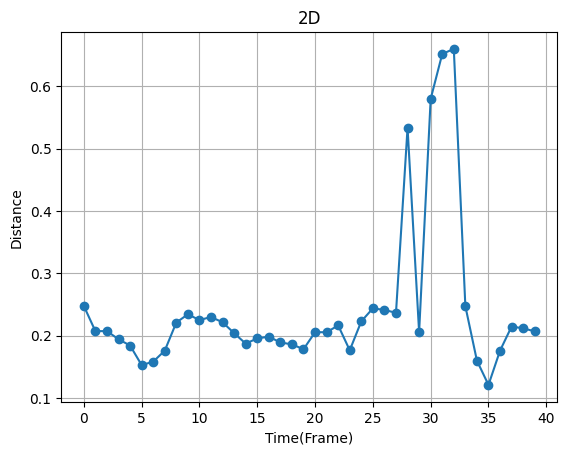

In [24]:
import matplotlib.pyplot as plt
import numpy as np



# X축은 2번째 shape인 40으로 설정
x_values = np.arange(x_train.shape[1])

# Y축은 각 데이터에 대한 평균값으로 설정
#y_values = x_train[1000][:,4,13]
y_values = x_valid_y1[100][:,4,13]

print(y_values)

# 그래프 그리기
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('2D')
plt.xlabel('Time(Frame)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


[0.44335549 0.43708524 0.44239756 0.43822879 0.43169422 0.4390721
 0.4373281  0.43631338 0.43177703 0.43310957 0.43336086 0.42606529
 0.41893672 0.42254406 0.42047033 0.42256246 0.42038105 0.4256473
 0.43881282 0.43841693 0.42765672 0.42164218 0.42165162 0.41827873
 0.4239081  0.42156755 0.41634725 0.41498867 0.41034931 0.41992605
 0.41893568 0.4235608  0.41400805 0.4134937  0.40927397 0.42296945
 0.42266172 0.41920792 0.41702581 0.40336787]


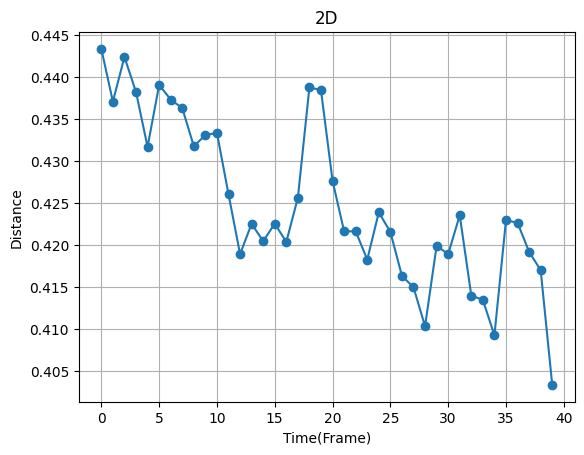

In [27]:
import matplotlib.pyplot as plt
import numpy as np



# X축은 2번째 shape인 40으로 설정
x_values = np.arange(x_train.shape[1])

# Y축은 각 데이터에 대한 평균값으로 설정
#y_values = x_train[1000][:,4,13]
y_values = x_valid_y1[50][:,4,13]

print(y_values)

# 그래프 그리기
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('2D')
plt.xlabel('Time(Frame)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


In [28]:
# Throwing-up
cat_keypoint_path = "/home/sm32289/Cat_Pose/KeypointDetection_Yolo/predict2/Abnormal/cat_throwing_up_refined/keypoints"
keypoints_files = [f for f in os.listdir(cat_keypoint_path)]
labels = []
sequences = []
for keypoints in keypoints_files:
    cnt = 0
    keypoints_path = os.path.join(cat_keypoint_path, keypoints)
    keypoint_file = [f for f in os.listdir(keypoints_path)]
    window = []
    for i in range(len(keypoint_file)):
        key = os.path.join(keypoints_path, f'{i}.npy')
        if os.path.exists(key):
            k = np.load(key)
            key_info = k[bbox:]
            dist = [[0] * (len(key_info)//2) for _ in range(len(key_info)//2)]
            for i in range(0,len(key_info),2):
                for j in range(0,len(key_info),2):
                    dist[i//2][j//2] = ((key_info[i] - key_info[j]) ** 2 + (key_info[i+1] - key_info[j+1]) ** 2)**0.5
            # dist = ((neck_idx[0] - tail_st_idx[0]) ** 2 + (neck_idx[1] - tail_st_idx[1]) ** 2)**0.5
            window.append(dist)
            cnt += 1
        if(cnt == sequence_length):
            new_list = [window[i] for i in range(0, len(window), pass_frames)]
            sequences.append(new_list)
            window = []
            labels.append(label_map['abnormal'])
            cnt = 0
    



write_file(txtfile_path,f'AbNormal data : {labels.count(1)}\n')
# Convert labels to numpy array
write_file(txtfile_path,f'np.array(sequence).shape : {np.array(sequences).shape}\n')
labels = np.array(labels)
X = np.array(sequences)
y = labels


In [29]:
print(X.shape)
print(y.shape)

(228, 40, 15, 15)
(228,)


[0.66316867 0.74517873 0.7800373  0.75801378 0.67342559 0.5818541
 0.66726296 0.67240614 0.66940339 0.67039032 0.64075357 0.65760605
 0.61015334 0.57616014 0.5418334  0.67609738 0.6758554  0.67222882
 0.67234085 0.29473795 0.29574824 0.30411208 0.28109118 0.27966943
 0.27796768 0.28032953 0.29530887 0.29605628 0.31092401 0.32175914
 0.30413507 0.28834824 0.26382091 0.31371381 0.36817924 0.35569364
 0.36755856 0.35107168 0.37317226 0.36906105]


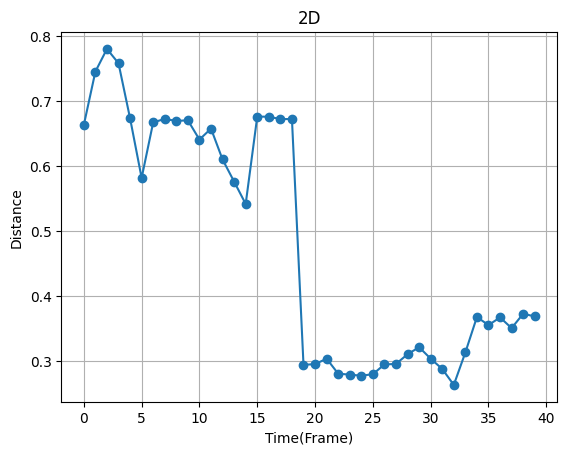

In [72]:
import matplotlib.pyplot as plt
import numpy as np



# X축은 2번째 shape인 40으로 설정
x_values = np.arange(X.shape[1])


for i in range(X.shape[0]):
    y_values = X[i][:,4,13]
    # 그래프 그리기
    plt.plot(x_values, y_values, marker='o', linestyle='-')
    plt.title('2D')
    plt.xlabel('Time(Frame)')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.savefig(f'{i}.png')  
    plt.show()
